# 1. Framing the Problem

The main efficiency problem credit organizations face with manual processes in determining the risk of a client is the time-consuming nature of data collection, analysis, and decision-making. Manual risk assessments often involve reviewing large volumes of client data, such as financial history, demographics, and loan characteristics, which can be prone to human error and inconsistency. This process not only delays loan approvals but also leads to suboptimal decisions due to the limitations of manual evaluation, such as bias or overlooking critical factors. As a result, the organization faces inefficiencies in terms of labor, operational costs, and missed opportunities for quicker loan disbursements, ultimately affecting their competitiveness in the market.

With the Data Science project I aim to provide a solution that could be used to automate and enhance the loan approval process of credit organizations by predicting the risk score of clients based on demographic, loan, and economic factors. Loan officers will leverage this model to make more informed decisions, with high-risk applicants receiving additional scrutiny or adjusted terms. The ultimate goal is to support a credit organization in maintaining a healthy balance between loan portfolio growth and risk mitigation while improving customer satisfaction through faster and fairer decision-making.



# 2. Data Aquisition

In [1]:
import pandas as pd
import numpy as np

In this step, I import the loan dataset which will be explored in further steps.

In [2]:
data = pd.read_csv('Loan.csv')
data = data.iloc[:,1:] #I will remove the date application since it does not make sense, there are approvals that apparently were made on 2072 (and the it is based on independent individuals)

In [3]:
data.head(5)

,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,NumberOfDependents,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
0,45,39948,617,Employed,Master,22,13152,48,Married,2,...,3329.000000,0.724972,11,126928,0.199652,0.227590,419.805992,0.181077,0,49.0
1,38,39709,628,Employed,Associate,15,26045,48,Single,1,...,3309.083333,0.935132,3,43609,0.207045,0.201077,794.054238,0.389852,0,52.0
2,47,40724,570,Employed,Bachelor,26,17627,36,Married,2,...,3393.666667,0.872241,6,5205,0.217627,0.212548,666.406688,0.462157,0,52.0
3,58,69084,545,Employed,High School,34,37898,96,Single,1,...,5757.000000,0.896155,5,99452,0.300398,0.300911,1047.506980,0.313098,0,54.0
4,37,103264,594,Employed,Associate,17,9184,36,Married,1,...,8605.333333,0.941369,5,227019,0.197184,0.175990,330.179140,0.070210,1,36.0


# 3. Data Exploration

The data exploration mainly consists on the data profiling in which I explore the existance of Missing Values, Descriptive Statistics and Correlations. Highly correlated features where dropped to avoid multicollinearity issues. In the second part of the data exploration step, I visually explore the behavior of the most correlated features with the Risk Score (by exploring the categorical features, it is possible to determine that most of them might not be that useful when it comes to predict the Risk Score).

In [4]:
data.info() #apparently there are no missing values; most of the features are numerical

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 35 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         20000 non-null  int64  
 1   AnnualIncome                20000 non-null  int64  
 2   CreditScore                 20000 non-null  int64  
 3   EmploymentStatus            20000 non-null  object 
 4   EducationLevel              20000 non-null  object 
 5   Experience                  20000 non-null  int64  
 6   LoanAmount                  20000 non-null  int64  
 7   LoanDuration                20000 non-null  int64  
 8   MaritalStatus               20000 non-null  object 
 9   NumberOfDependents          20000 non-null  int64  
 10  HomeOwnershipStatus         20000 non-null  object 
 11  MonthlyDebtPayments         20000 non-null  int64  
 12  CreditCardUtilizationRate   20000 non-null  float64
 13  NumberOfOpenCreditLines     200

In [5]:
#Although Bankrupty and Previous Loan Defaults have int64 Dtype, they should be treated as categorical data.
data['BankruptcyHistory'] = data['BankruptcyHistory'].replace({1:'Yes', 0:'No'})
data['PreviousLoanDefaults'] = data['PreviousLoanDefaults'].replace({1:'Yes', 0:'No'})

In [6]:
#I will set appart the categorical features (object)
object_features = data.select_dtypes(include=['object']).columns.tolist()
object_features

['EmploymentStatus',
 'EducationLevel',
 'MaritalStatus',
 'HomeOwnershipStatus',
 'BankruptcyHistory',
 'LoanPurpose',
 'PreviousLoanDefaults']

In [7]:
#Count the number of occurrences per category
for feature in object_features:
    print(data[feature].value_counts())

EmploymentStatus
Employed         17036
Self-Employed     1573
Unemployed        1391
Name: count, dtype: int64
EducationLevel
Bachelor       6054
High School    5908
Associate      4034
Master         3050
Doctorate       954
Name: count, dtype: int64
MaritalStatus
Married     10041
Single       6078
Divorced     2882
Widowed       999
Name: count, dtype: int64
HomeOwnershipStatus
Mortgage    7939
Rent        6087
Own         3938
Other       2036
Name: count, dtype: int64
BankruptcyHistory
No     18952
Yes     1048
Name: count, dtype: int64
LoanPurpose
Home                  5925
Debt Consolidation    5027
Auto                  4034
Education             3008
Other                 2006
Name: count, dtype: int64
PreviousLoanDefaults
No     17999
Yes     2001
Name: count, dtype: int64


In [8]:
#Now I will perform descriptive statistics for the numerical features
data.describe()

,Age,AnnualIncome,CreditScore,Experience,LoanAmount,LoanDuration,NumberOfDependents,MonthlyDebtPayments,CreditCardUtilizationRate,NumberOfOpenCreditLines,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,...,20000.000000,20000.000000,20000.000000,2.000000e+04,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,39.752600,59161.473550,571.612400,17.522750,24882.867800,54.057000,1.517300,454.292700,0.286381,3.023350,...,4891.715521,0.799918,5.002650,7.229432e+04,0.239124,0.239110,911.607052,0.402182,0.239000,50.766780
std,11.622713,40350.845168,50.997358,11.316836,13427.421217,24.664857,1.386325,240.507609,0.159793,1.736161,...,3296.771598,0.120665,2.236804,1.179200e+05,0.035509,0.042205,674.583473,0.338924,0.426483,7.778262
min,18.000000,15000.000000,343.000000,0.000000,3674.000000,12.000000,0.000000,50.000000,0.000974,0.000000,...,1250.000000,0.259203,0.000000,1.000000e+03,0.130101,0.113310,97.030193,0.016043,0.000000,28.800000
25%,32.000000,31679.000000,540.000000,9.000000,15575.000000,36.000000,0.000000,286.000000,0.160794,2.000000,...,2629.583333,0.727379,3.000000,8.734750e+03,0.213889,0.209142,493.763700,0.179693,0.000000,46.000000
50%,40.000000,48566.000000,578.000000,17.000000,21914.500000,48.000000,1.000000,402.000000,0.266673,3.000000,...,4034.750000,0.820962,5.000000,3.285550e+04,0.236157,0.235390,728.511452,0.302711,0.000000,52.000000
75%,48.000000,74391.000000,609.000000,25.000000,30835.000000,72.000000,2.000000,564.000000,0.390634,4.000000,...,6163.000000,0.892333,6.000000,8.882550e+04,0.261533,0.265532,1112.770759,0.509214,0.000000,56.000000
max,80.000000,485341.000000,712.000000,61.000000,184732.000000,120.000000,5.000000,2919.000000,0.917380,13.000000,...,25000.000000,0.999433,16.000000,2.603208e+06,0.405029,0.446787,10892.629520,4.647657,1.000000,84.000000


In [9]:
#I will drop the variable Loan Approved as it would be an output variable for a classification model and has nothing to do with the Risk Score
data.drop(columns='LoanApproved', inplace=True)

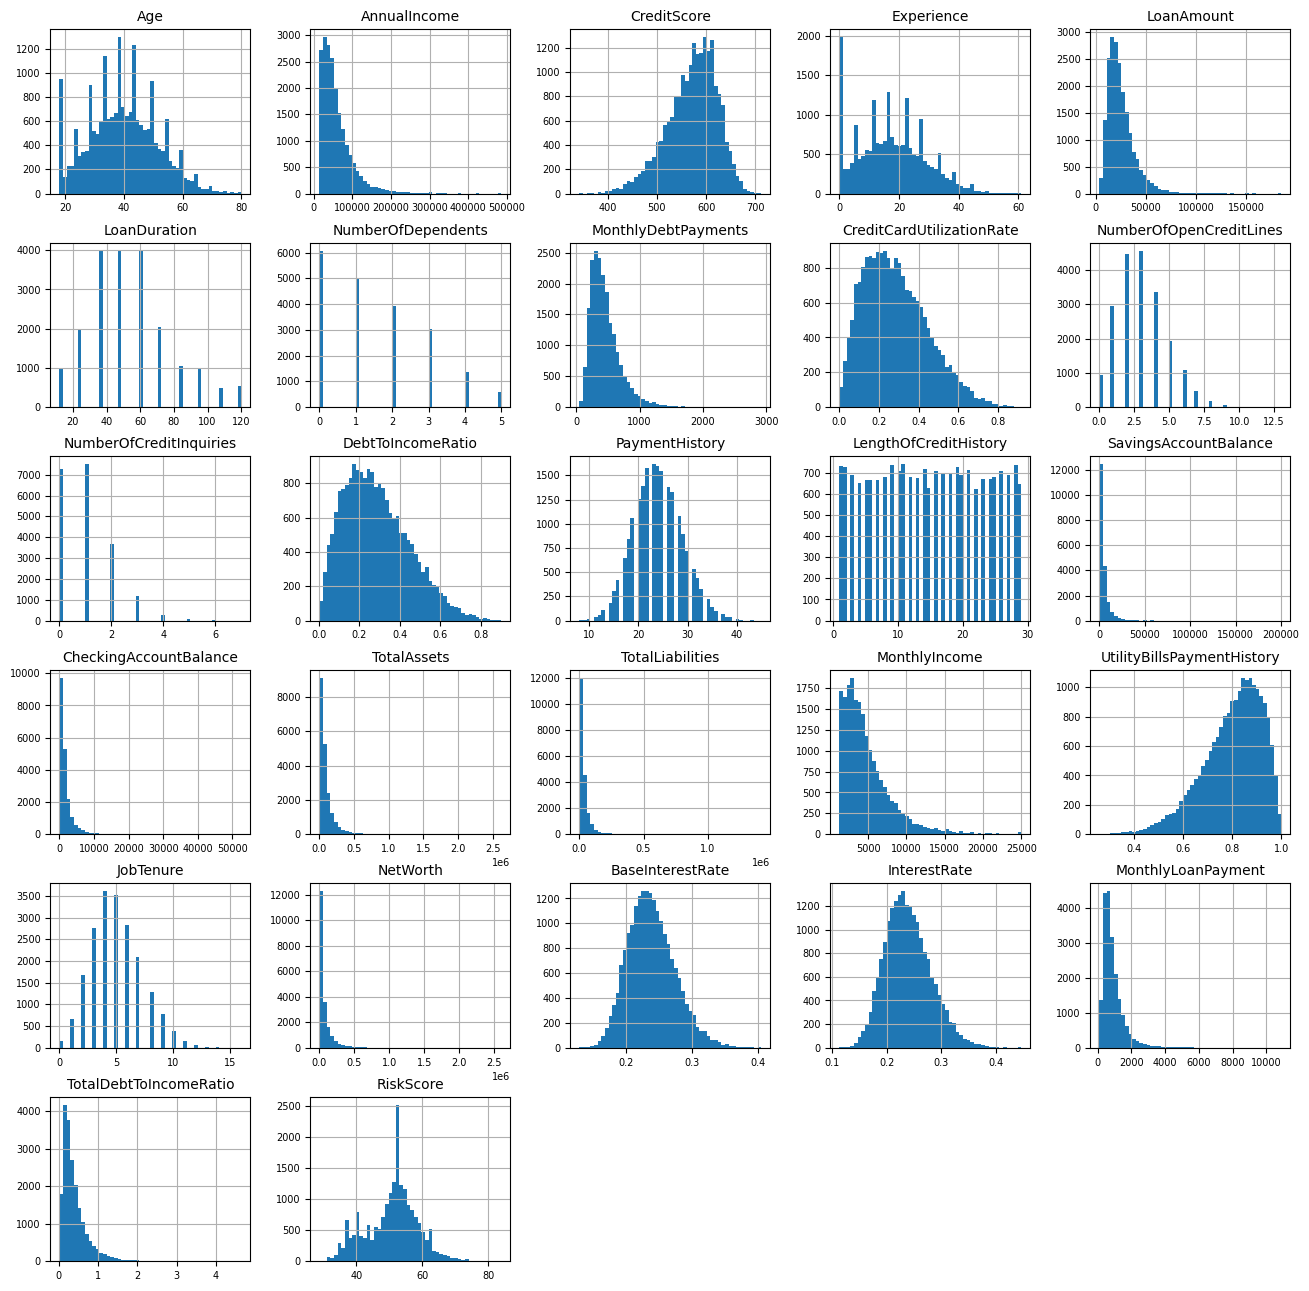

In [10]:
import matplotlib.pyplot as plt

plt.rc('font', size = 10)   #rc serves to set the configuration of the plots appearance
plt.rc('axes', labelsize = 10, titlesize = 10)
plt.rc('legend', fontsize = 10)
plt.rc('xtick', labelsize = 7)
plt.rc('ytick', labelsize = 7)

data.hist(bins=50, figsize=(16,16))
plt.show()


Before starting to explore the relationship between the features, I will split the data into a train and a test dataset. The remaining exploration will be done over the train dataset.

In [75]:
#For reproducibility I will set a seed
np.random.seed(123)

In [12]:
#I will split the data in a train and test dataset, and explore in more depth the train dataset.
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(data, test_size=0.2, random_state=123)

<Axes: >

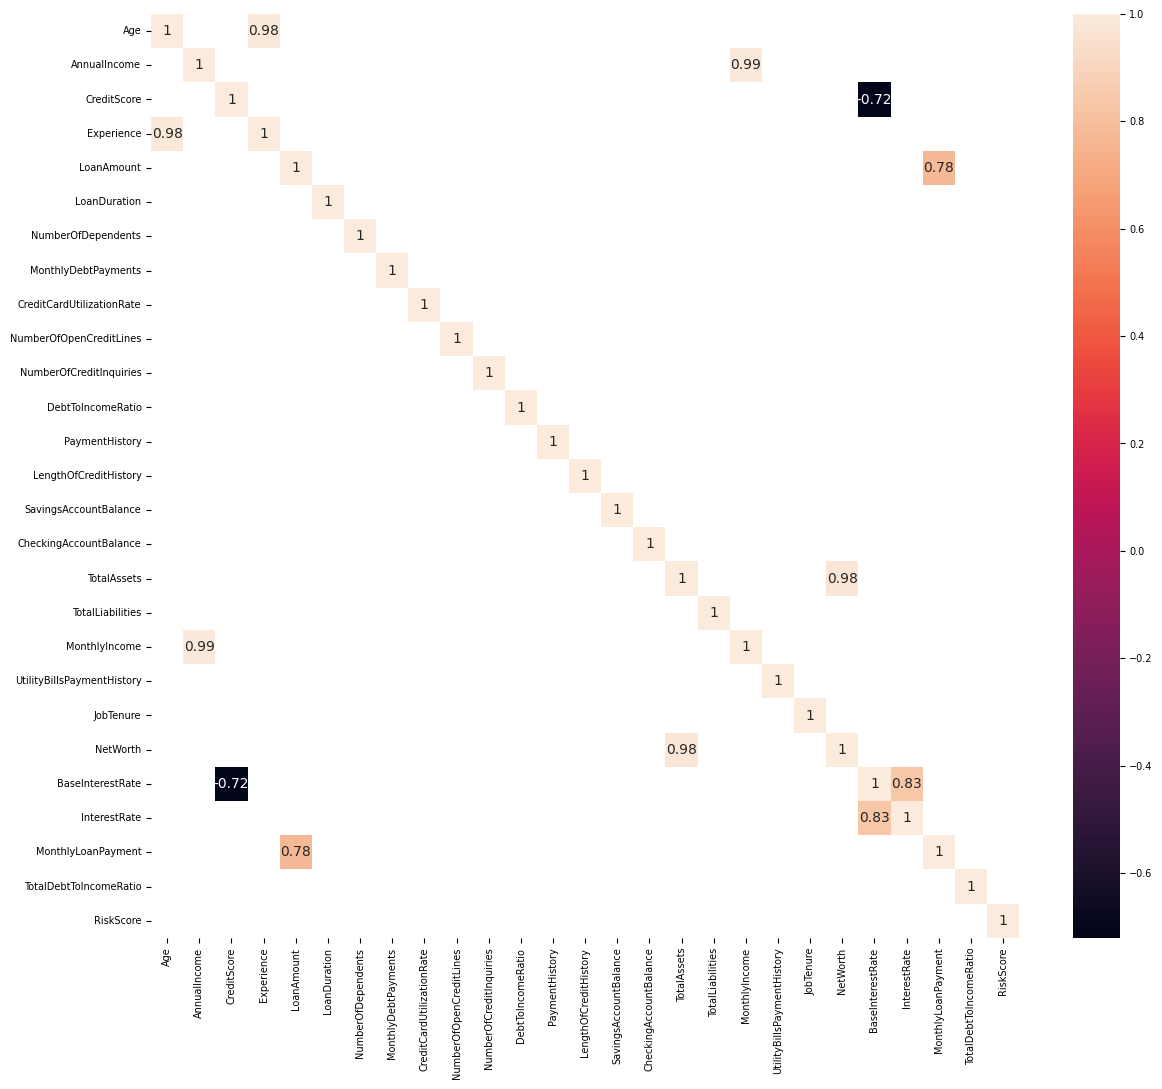

In [16]:
#I will explore the correlation matrix of the numerical features to explore potential multicollinearity problems:
#Correlation Matrix
corr_matrix = train_set.corr(numeric_only = True)
#Plot of the Correlation Matrix
import seaborn as sns
plt.figure(figsize=(14,12))

# Create a mask for correlations below 60% (absolute value)
threshold = 0.6
mask = np.abs(corr_matrix) < threshold  # Mask values below the threshold

sns.heatmap(corr_matrix, mask=mask, annot=True)
#corr_matrix['RiskScore'].sort_values(ascending=False)

In [17]:
#Since definitively, there are cases of high correlation I will proceed to remove them from the dataset as they will cause multicollinearity issues
train_set.drop(columns=['Age','AnnualIncome', 'TotalAssets'], inplace=True)
test_set.drop(columns=['Age','AnnualIncome', 'TotalAssets'], inplace = True)

In [18]:
#Let's check the most correlated predictors with the target variables (risk score). 
# We can hypothesize that monthly income, net worth, and the relationship between debt and income will be the most important features to predict the risk score. 
corr_matrix = train_set.corr(numeric_only = True)
corr_matrix['RiskScore'].sort_values(ascending=False)

RiskScore                     1.000000
TotalDebtToIncomeRatio        0.346145
DebtToIncomeRatio             0.330344
InterestRate                  0.272676
BaseInterestRate              0.261200
LoanAmount                    0.142075
MonthlyLoanPayment            0.119261
CreditCardUtilizationRate     0.109504
LoanDuration                  0.056642
TotalLiabilities              0.051992
MonthlyDebtPayments           0.043276
NumberOfOpenCreditLines       0.011243
SavingsAccountBalance         0.006416
NumberOfCreditInquiries       0.000424
NumberOfDependents           -0.000259
JobTenure                    -0.000815
CheckingAccountBalance       -0.001324
UtilityBillsPaymentHistory   -0.011086
PaymentHistory               -0.015533
Experience                   -0.168062
LengthOfCreditHistory        -0.176370
CreditScore                  -0.243482
NetWorth                     -0.306320
MonthlyIncome                -0.487528
Name: RiskScore, dtype: float64

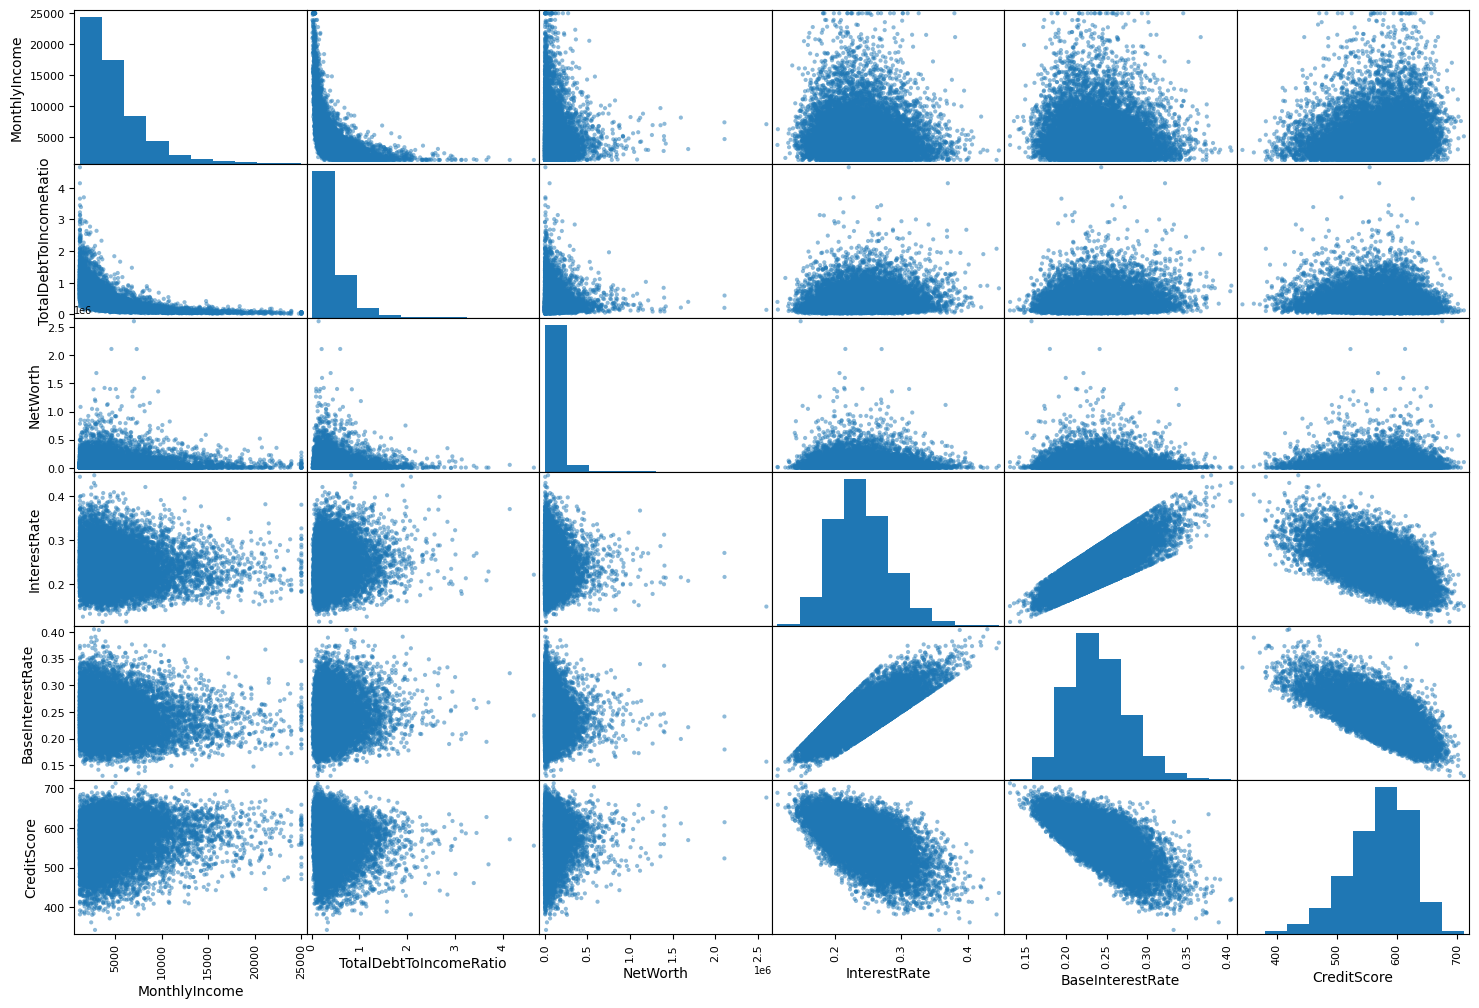

In [19]:
#Let's check for the relationships between the most correlated features
from pandas.plotting import scatter_matrix

attributes = ['MonthlyIncome','TotalDebtToIncomeRatio', 'NetWorth', 'InterestRate', 'BaseInterestRate', 'CreditScore']
scatter_matrix(train_set[attributes], figsize = (18,12))
plt.show()

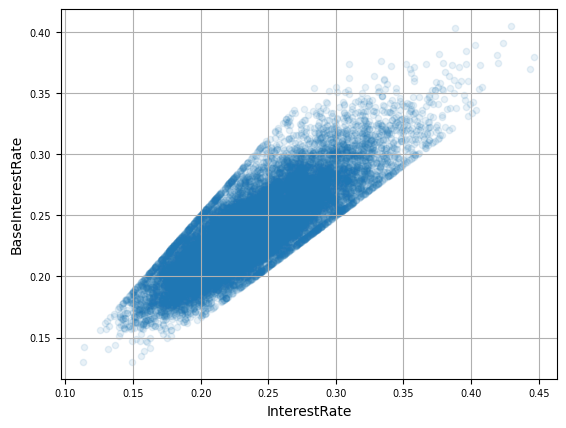

In [20]:
#As expected Base Interest Rate (benchmark rate) and Interest Rate (interest rate charged by the lender) are related
train_set.plot(kind='scatter', x = 'InterestRate', y='BaseInterestRate', alpha = 0.1, grid=True)
plt.show()

/var/folders/7z/47q7rxfx55x97dcz64l8v83m0000gn/T/ipykernel_3625/1115127994.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=train_set, x='EducationLevel', y='RiskScore', palette='viridis', ax=axes[0,0])
/var/folders/7z/47q7rxfx55x97dcz64l8v83m0000gn/T/ipykernel_3625/1115127994.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=train_set, x = 'MaritalStatus', y='RiskScore', palette='viridis',ax = axes[1,0])
/var/folders/7z/47q7rxfx55x97dcz64l8v83m0000gn/T/ipykernel_3625/1115127994.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.b

<Axes: xlabel='PreviousLoanDefaults', ylabel='RiskScore'>

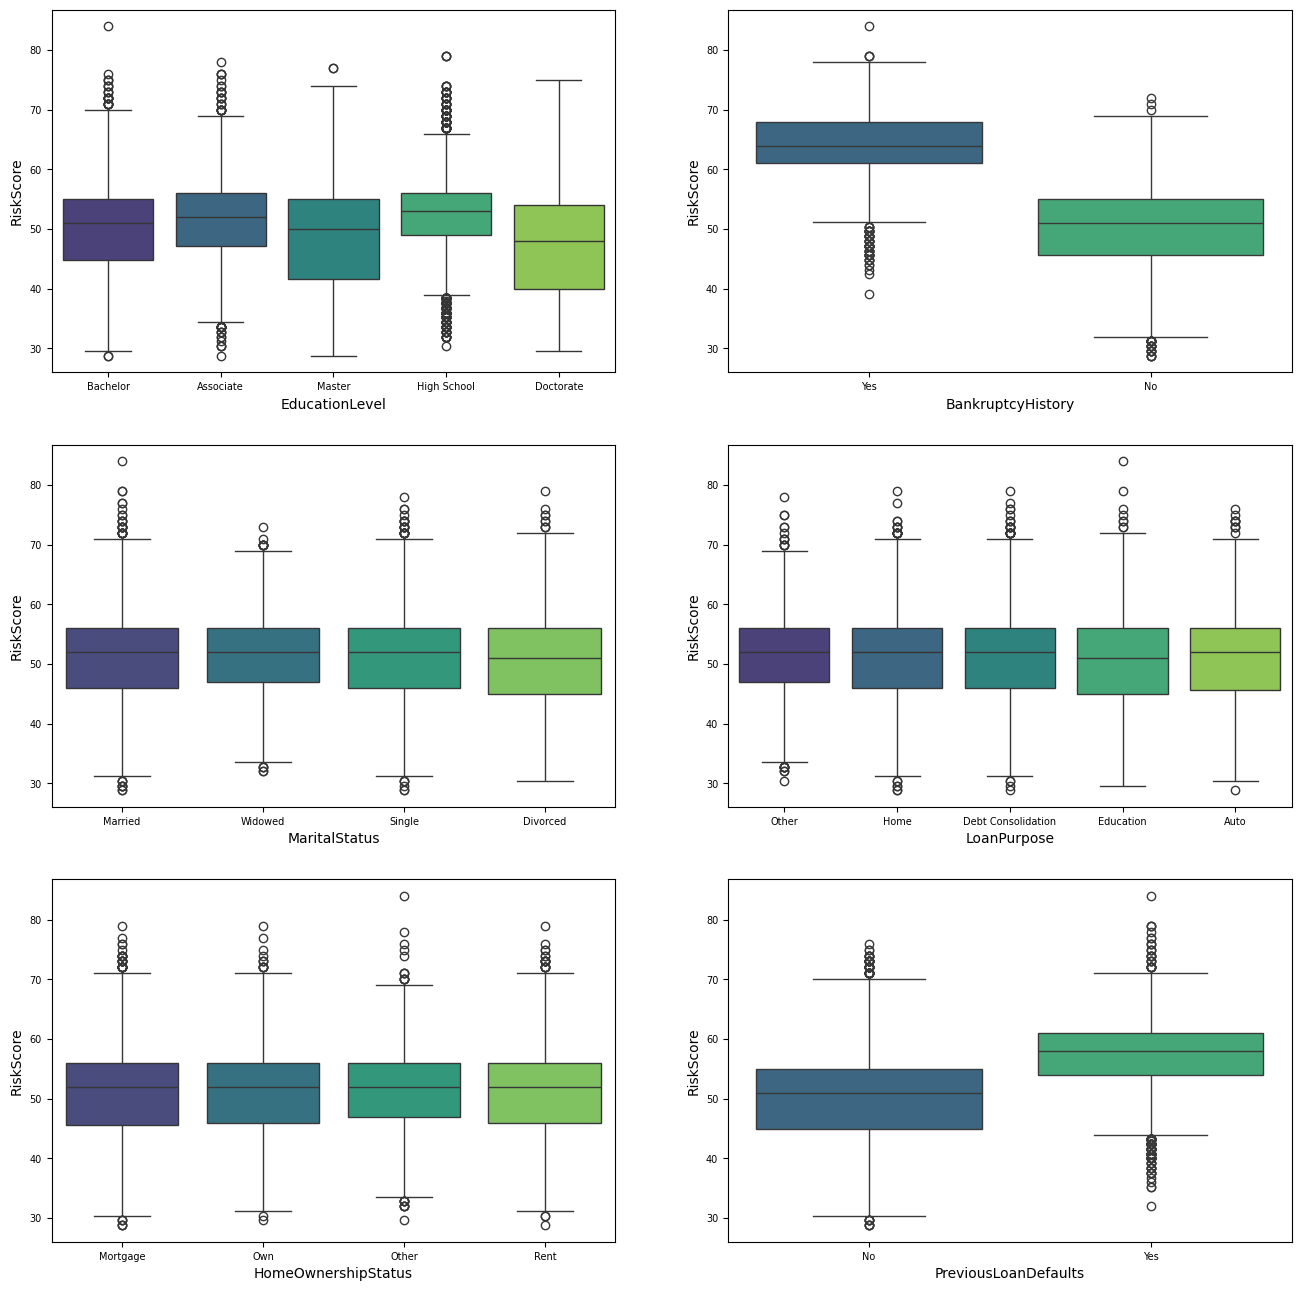

In [21]:
#Now let's explore the relationship between the categorical features and Risk Score ['EmploymentStatus',
 #'EducationLevel',
 #'MaritalStatus',
 #'HomeOwnershipStatus',
 #'BankruptcyHistory',
 #'LoanPurpose',
 #'PreviousLoanDefaults']
fig, axes = plt.subplots(3,2, figsize = (16,16))

sns.boxplot(data=train_set, x='EducationLevel', y='RiskScore', palette='viridis', ax=axes[0,0])
sns.boxplot(data=train_set, x = 'MaritalStatus', y='RiskScore', palette='viridis',ax = axes[1,0])
sns.boxplot(data=train_set, x = 'HomeOwnershipStatus', y='RiskScore', palette='viridis',ax = axes[2,0])
sns.boxplot(data=train_set, x = 'BankruptcyHistory', y='RiskScore', palette='viridis',ax = axes[0,1])
sns.boxplot(data=train_set, x = 'LoanPurpose', y='RiskScore', palette='viridis',ax = axes[1,1])
sns.boxplot(data=train_set, x = 'PreviousLoanDefaults', y='RiskScore', palette='viridis',ax = axes[2,1])

# 4. Data Preparation

In the data preparation step, I start with some featuring engineering (creation of new features derived from the current features); then a correlation matrix is calculated to check the relationship of the derived features with the Risk Score. In the second part of the Data Preparation step, a Random Forest wioth default parameters is applied over the train dataset to check the feature importance and select the features that will be used in the modelling section. In the third part of the Data Preparation, I created the pipelines to preprocess the dataset; these pipelines include the creation of the derived features, a logarithmic transformation for the most skewed features, a kernel similarity calculation applied for the experience feature, a one-hot encoding applied for the categorical features, and a standarization for the rest of the continuous features. The result of this step is a complete data preparation pipeline, which outputs a dataframe that will be used in the modelling section.

In [22]:
#I will create a copy of the train dataset to see how the derived features correlate with the dependent variable
train_set_m = train_set.copy()
test_set_m = test_set.copy()
#Since these 2 features are strongly related I would prefer to use a derived feature that considers both metrics. That would be the spread (margin), that isolates lender-specific risk factors that are not texplained by the base rate
train_set_m['spread'] = train_set_m['InterestRate'] - train_set_m['BaseInterestRate']
test_set_m['spread'] = test_set_m['InterestRate'] - test_set_m['BaseInterestRate']

In [23]:
#Create an Income Stability Feature based on the income and the person's savings
train_set_m['Income_Stability'] = (train_set_m['SavingsAccountBalance'] + train_set_m['CheckingAccountBalance'])/train_set_m['MonthlyIncome']
test_set_m['Income_Stability'] = (test_set_m['SavingsAccountBalance'] + test_set_m['CheckingAccountBalance'])/test_set_m['MonthlyIncome']

In [24]:
#Create a Credit Inquity Intensity Score: A higher ratio would suggest aggressive credit-seeking behavior
train_set_m['Credit_Inquiry_Intensity'] = train_set_m['NumberOfCreditInquiries']/train_set_m['LengthOfCreditHistory']
test_set_m['Credit_Inquiry_Intensity'] = test_set_m['NumberOfCreditInquiries']/test_set_m['LengthOfCreditHistory']

In [25]:
#Create a Disposable Income Metric (after the monthly payment of the debt and loan)
train_set_m['DisposableIncome'] = train_set_m['MonthlyIncome'] - train_set_m['MonthlyDebtPayments'] - train_set_m['MonthlyLoanPayment']
test_set_m['DisposableIncome'] = test_set_m['MonthlyIncome'] - test_set_m['MonthlyDebtPayments'] - test_set_m['MonthlyLoanPayment']

In [26]:
corr_matrix = train_set_m.corr(numeric_only=True)
corr_matrix['RiskScore'].sort_values(ascending=False)

RiskScore                     1.000000
TotalDebtToIncomeRatio        0.346145
DebtToIncomeRatio             0.330344
InterestRate                  0.272676
BaseInterestRate              0.261200
Income_Stability              0.177647
LoanAmount                    0.142075
MonthlyLoanPayment            0.119261
Credit_Inquiry_Intensity      0.109874
CreditCardUtilizationRate     0.109504
spread                        0.095634
LoanDuration                  0.056642
TotalLiabilities              0.051992
MonthlyDebtPayments           0.043276
NumberOfOpenCreditLines       0.011243
SavingsAccountBalance         0.006416
NumberOfCreditInquiries       0.000424
NumberOfDependents           -0.000259
JobTenure                    -0.000815
CheckingAccountBalance       -0.001324
UtilityBillsPaymentHistory   -0.011086
PaymentHistory               -0.015533
Experience                   -0.168062
LengthOfCreditHistory        -0.176370
CreditScore                  -0.243482
NetWorth                 

Prepare Data for Machine Learning Algorithms

In [29]:
#I will use again the original training dataset (without the derived features)
X_train = train_set.drop(columns=['RiskScore'])
Y_train = train_set['RiskScore']

X_test = test_set.drop(columns=['RiskScore'])
Y_test = test_set['RiskScore']

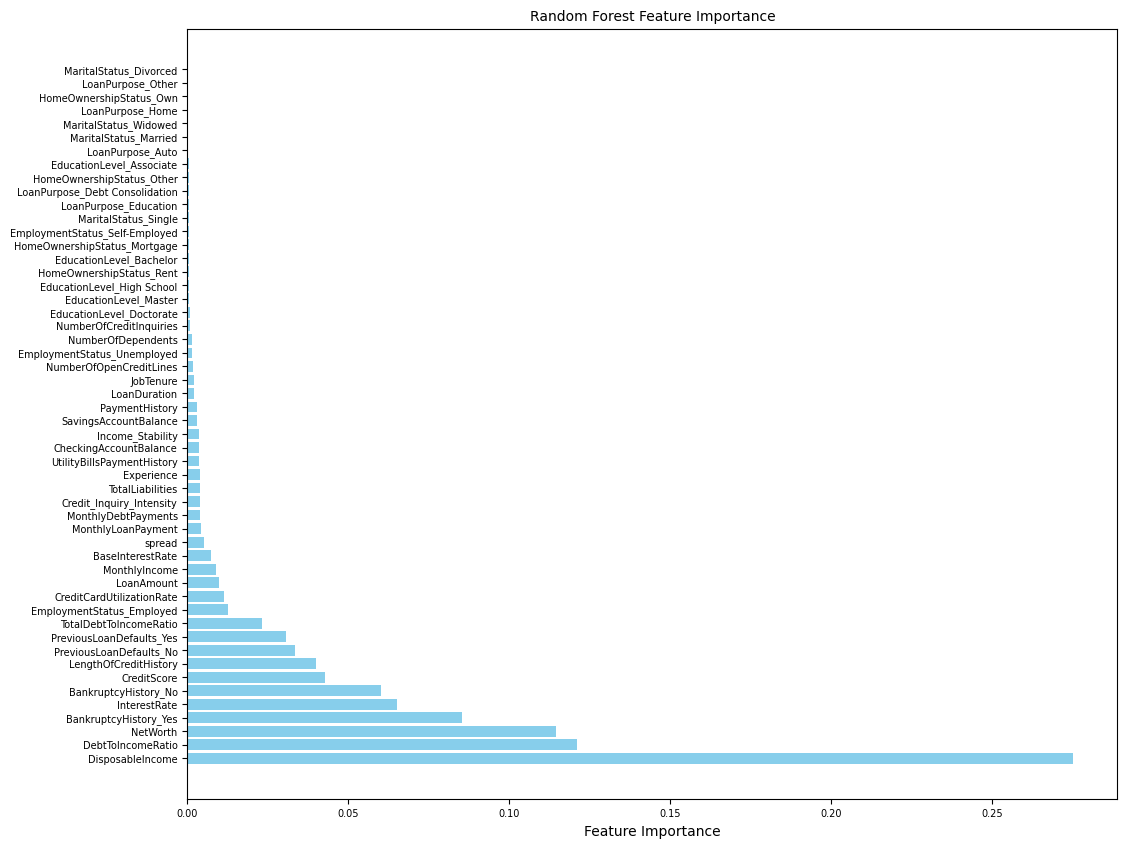

In [30]:
#Here I will due some Feature Selection using the standard RF
train_set_m = train_set_m.drop(columns='RiskScore')
X_train_encoded = pd.get_dummies(train_set_m)
from sklearn.ensemble import RandomForestRegressor

#X_train_encoded = pd.get_dummies(X_train_encoded, drop_first=True)
rf = RandomForestRegressor(random_state=123)
rf.fit(X_train_encoded, Y_train)

#Extract the feature importances
importances = rf.feature_importances_

# Sort the feature importances in descending order
indices = np.argsort(importances)[::-1]  # Reverse to sort in descending order

# Plotting
plt.figure(figsize=(12, 10))
plt.barh(X_train_encoded.columns[indices], importances[indices], color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Random Forest Feature Importance')
plt.show()


In [31]:
#Based on the previous analysis, 5 features will be removed as they are not relevant (this can also be confirmed with the previous boxplots): 
#1. MaritalStatus
#2. LoanPurpose
#3. EducationLevel
#4. HomeOwnershipStatus
#5. EmploymentStatus

X_train = X_train.drop(columns=['MaritalStatus','LoanPurpose','EducationLevel','HomeOwnershipStatus','EmploymentStatus'])
X_test = X_test.drop(columns=['MaritalStatus','LoanPurpose','EducationLevel','HomeOwnershipStatus','EmploymentStatus'])

In [33]:
X_train_num = X_train.select_dtypes(include=[np.number])
X_train_num

,CreditScore,Experience,LoanAmount,LoanDuration,NumberOfDependents,MonthlyDebtPayments,CreditCardUtilizationRate,NumberOfOpenCreditLines,NumberOfCreditInquiries,DebtToIncomeRatio,...,CheckingAccountBalance,TotalLiabilities,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio
9642,631,21,66783,48,1,356,0.274779,4,1,0.113160,...,2394,5063,2333.250000,0.871206,3,62034,0.246283,0.233965,2155.026199,1.076193
17924,599,6,16804,36,0,212,0.169760,1,1,0.167244,...,990,35014,2171.333333,0.892336,5,16386,0.202304,0.200333,624.782096,0.385377
1642,617,16,20062,96,5,264,0.209578,2,1,0.243349,...,847,11295,12966.500000,0.727239,3,14996,0.246562,0.282763,529.316924,0.061182
9670,583,16,25134,96,2,158,0.038170,3,1,0.177235,...,964,22706,6384.750000,0.974916,7,6393,0.268634,0.270400,641.941435,0.125289
16860,521,27,39453,108,3,244,0.318024,3,0,0.189982,...,4864,212455,3541.916667,0.672267,5,8381,0.323953,0.375130,1279.381282,0.430101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7763,599,26,45967,60,0,323,0.456332,2,1,0.162122,...,276,2115,1250.000000,0.798471,6,81109,0.251467,0.248229,1344.424691,1.333940
15377,570,35,16143,36,1,381,0.147192,5,0,0.100020,...,2486,13487,9772.916667,0.811249,1,67759,0.216143,0.202508,601.996247,0.100584
17730,558,0,18994,72,0,292,0.141108,2,0,0.124611,...,525,15460,1553.500000,0.962080,5,306293,0.254994,0.253249,515.438524,0.519754
15725,467,5,16675,60,2,777,0.167926,3,1,0.418307,...,7808,34087,2683.666667,0.758721,3,4719,0.288175,0.265601,504.801420,0.477631


In [34]:
#Let's check if there are missing values
X_train.isnull().sum()

CreditScore                   0
Experience                    0
LoanAmount                    0
LoanDuration                  0
NumberOfDependents            0
MonthlyDebtPayments           0
CreditCardUtilizationRate     0
NumberOfOpenCreditLines       0
NumberOfCreditInquiries       0
DebtToIncomeRatio             0
BankruptcyHistory             0
PreviousLoanDefaults          0
PaymentHistory                0
LengthOfCreditHistory         0
SavingsAccountBalance         0
CheckingAccountBalance        0
TotalLiabilities              0
MonthlyIncome                 0
UtilityBillsPaymentHistory    0
JobTenure                     0
NetWorth                      0
BaseInterestRate              0
InterestRate                  0
MonthlyLoanPayment            0
TotalDebtToIncomeRatio        0
dtype: int64

In [35]:
#For the pipeline this would be the code that would be used to deal with missing values, which I will let just for future uses
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')

In [36]:
#As saw in a previous step, there are no missing values in the dataset
#Let's drop some outliers
from sklearn.ensemble import IsolationForest

isolation_forest = IsolationForest(random_state=123)
outlier_pred = isolation_forest.fit_predict(X_train_num)

In [ ]:
#In case the identified outliers were dropped
#X_train = X_train.loc[outlier_pred == 1]
#Y_train = Y_train.loc[outlier_pred == 1]

Handling Text and Categorical Features

In [37]:
#Since none of the features has a specific order, the most appropiate encoding technique would be one-hot-encoding
#First I need to concatenate the train and test data set, so that they encoding is consistent across all the dataset
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop='first', sparse_output=False) #To avoid multicollinearity issues
object_features = X_train.select_dtypes(include=['object']).columns.tolist()

X_train_encoded = encoder.fit_transform(X_train[object_features])
X_test_encoded = encoder.transform(X_test[object_features])

In [38]:
#Do the encoding
X_train_encoded = pd.DataFrame(X_train_encoded, columns=encoder.get_feature_names_out(object_features))
X_test_encoded = pd.DataFrame(X_test_encoded, columns=encoder.get_feature_names_out(object_features))
X_train_encoded

,BankruptcyHistory_Yes,PreviousLoanDefaults_Yes
0,1.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0
...,...,...
15995,0.0,1.0
15996,0.0,0.0
15997,0.0,0.0
15998,0.0,0.0


Feature Scaling

In [39]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler() #This trasnformation will be the one that would be applied by default

In [40]:
#This transformation will be applied for the experience feature, as it does not have a clear distribution
from sklearn.metrics.pairwise import rbf_kernel

Experience_sim = rbf_kernel(train_set[['Experience']], [[17.5]], gamma=0.03)

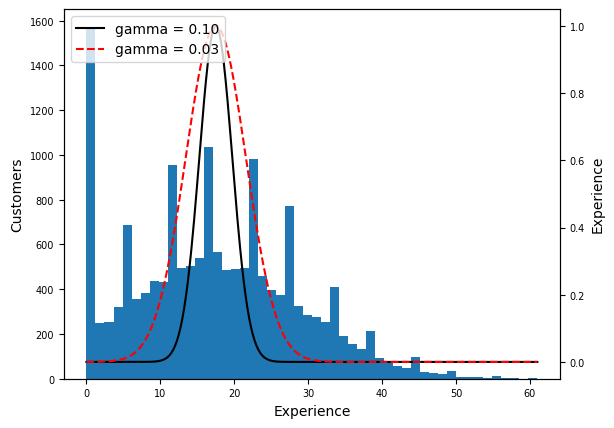

In [41]:
#Extra code to decide on the gamma value for the previous similarity function - decision: 0.03 better captures the extreme values
experience = np.linspace(train_set['Experience'].min(), train_set['Experience'].max(), 500).reshape(-1,1)

gamma1 = 0.1
gamma2 = 0.03

rbf1 = rbf_kernel(experience, [[17.5]], gamma=gamma1)
rbf2 = rbf_kernel(experience, [[17.5]], gamma=gamma2)

fig, ax1 = plt.subplots()

ax1.set_xlabel('Experience')
ax1.set_ylabel('Customers')
ax1.hist(train_set['Experience'], bins = 50)

ax2 = ax1.twinx() #Creates a twin axis that shares the same x-axis
color = 'black'
ax2.plot(experience, rbf1, color = color, label = 'gamma = 0.10')
ax2.plot(experience, rbf2, color = 'red', label = 'gamma = 0.03', linestyle = '--')
ax2.tick_params(axis = 'y', labelcolor = color)
ax2.set_ylabel('Experience', color = color)

plt.legend(loc='upper left')
plt.show()

In [42]:
columns_logs = ['LoanAmount','MonthlyDebtPayments','SavingsAccountBalance', 'CheckingAccountBalance',
                'TotalLiabilities','MonthlyIncome','NetWorth','MonthlyLoanPayment','TotalDebtToIncomeRatio']

log_cols = train_set[columns_logs].copy()

for col in log_cols:
    log_cols[f'Log_{col}'] = np.log(log_cols[col] + 1) #+1 to avoid log(0)


/var/folders/7z/47q7rxfx55x97dcz64l8v83m0000gn/T/ipykernel_3625/3791696252.py:9: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=log_cols, x='LoanAmount', palette='viridis', ax=axes[0, 0])
/var/folders/7z/47q7rxfx55x97dcz64l8v83m0000gn/T/ipykernel_3625/3791696252.py:12: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=log_cols, x='Log_LoanAmount', palette='viridis', ax=axes[0, 1])
/var/folders/7z/47q7rxfx55x97dcz64l8v83m0000gn/T/ipykernel_3625/3791696252.py:15: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=log_cols, x='MonthlyDebtPayments', palette='viridis', ax=axes[1, 0])
/var/folders/7z/47q7rxfx55x97dcz64l8v83m0000gn/T/ipykernel_3625/3791696252.py:18: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=log_cols, x='Log_MonthlyDebtPayments', palette='viridis', ax=axes[1, 1])
/var/folders/7z/47q

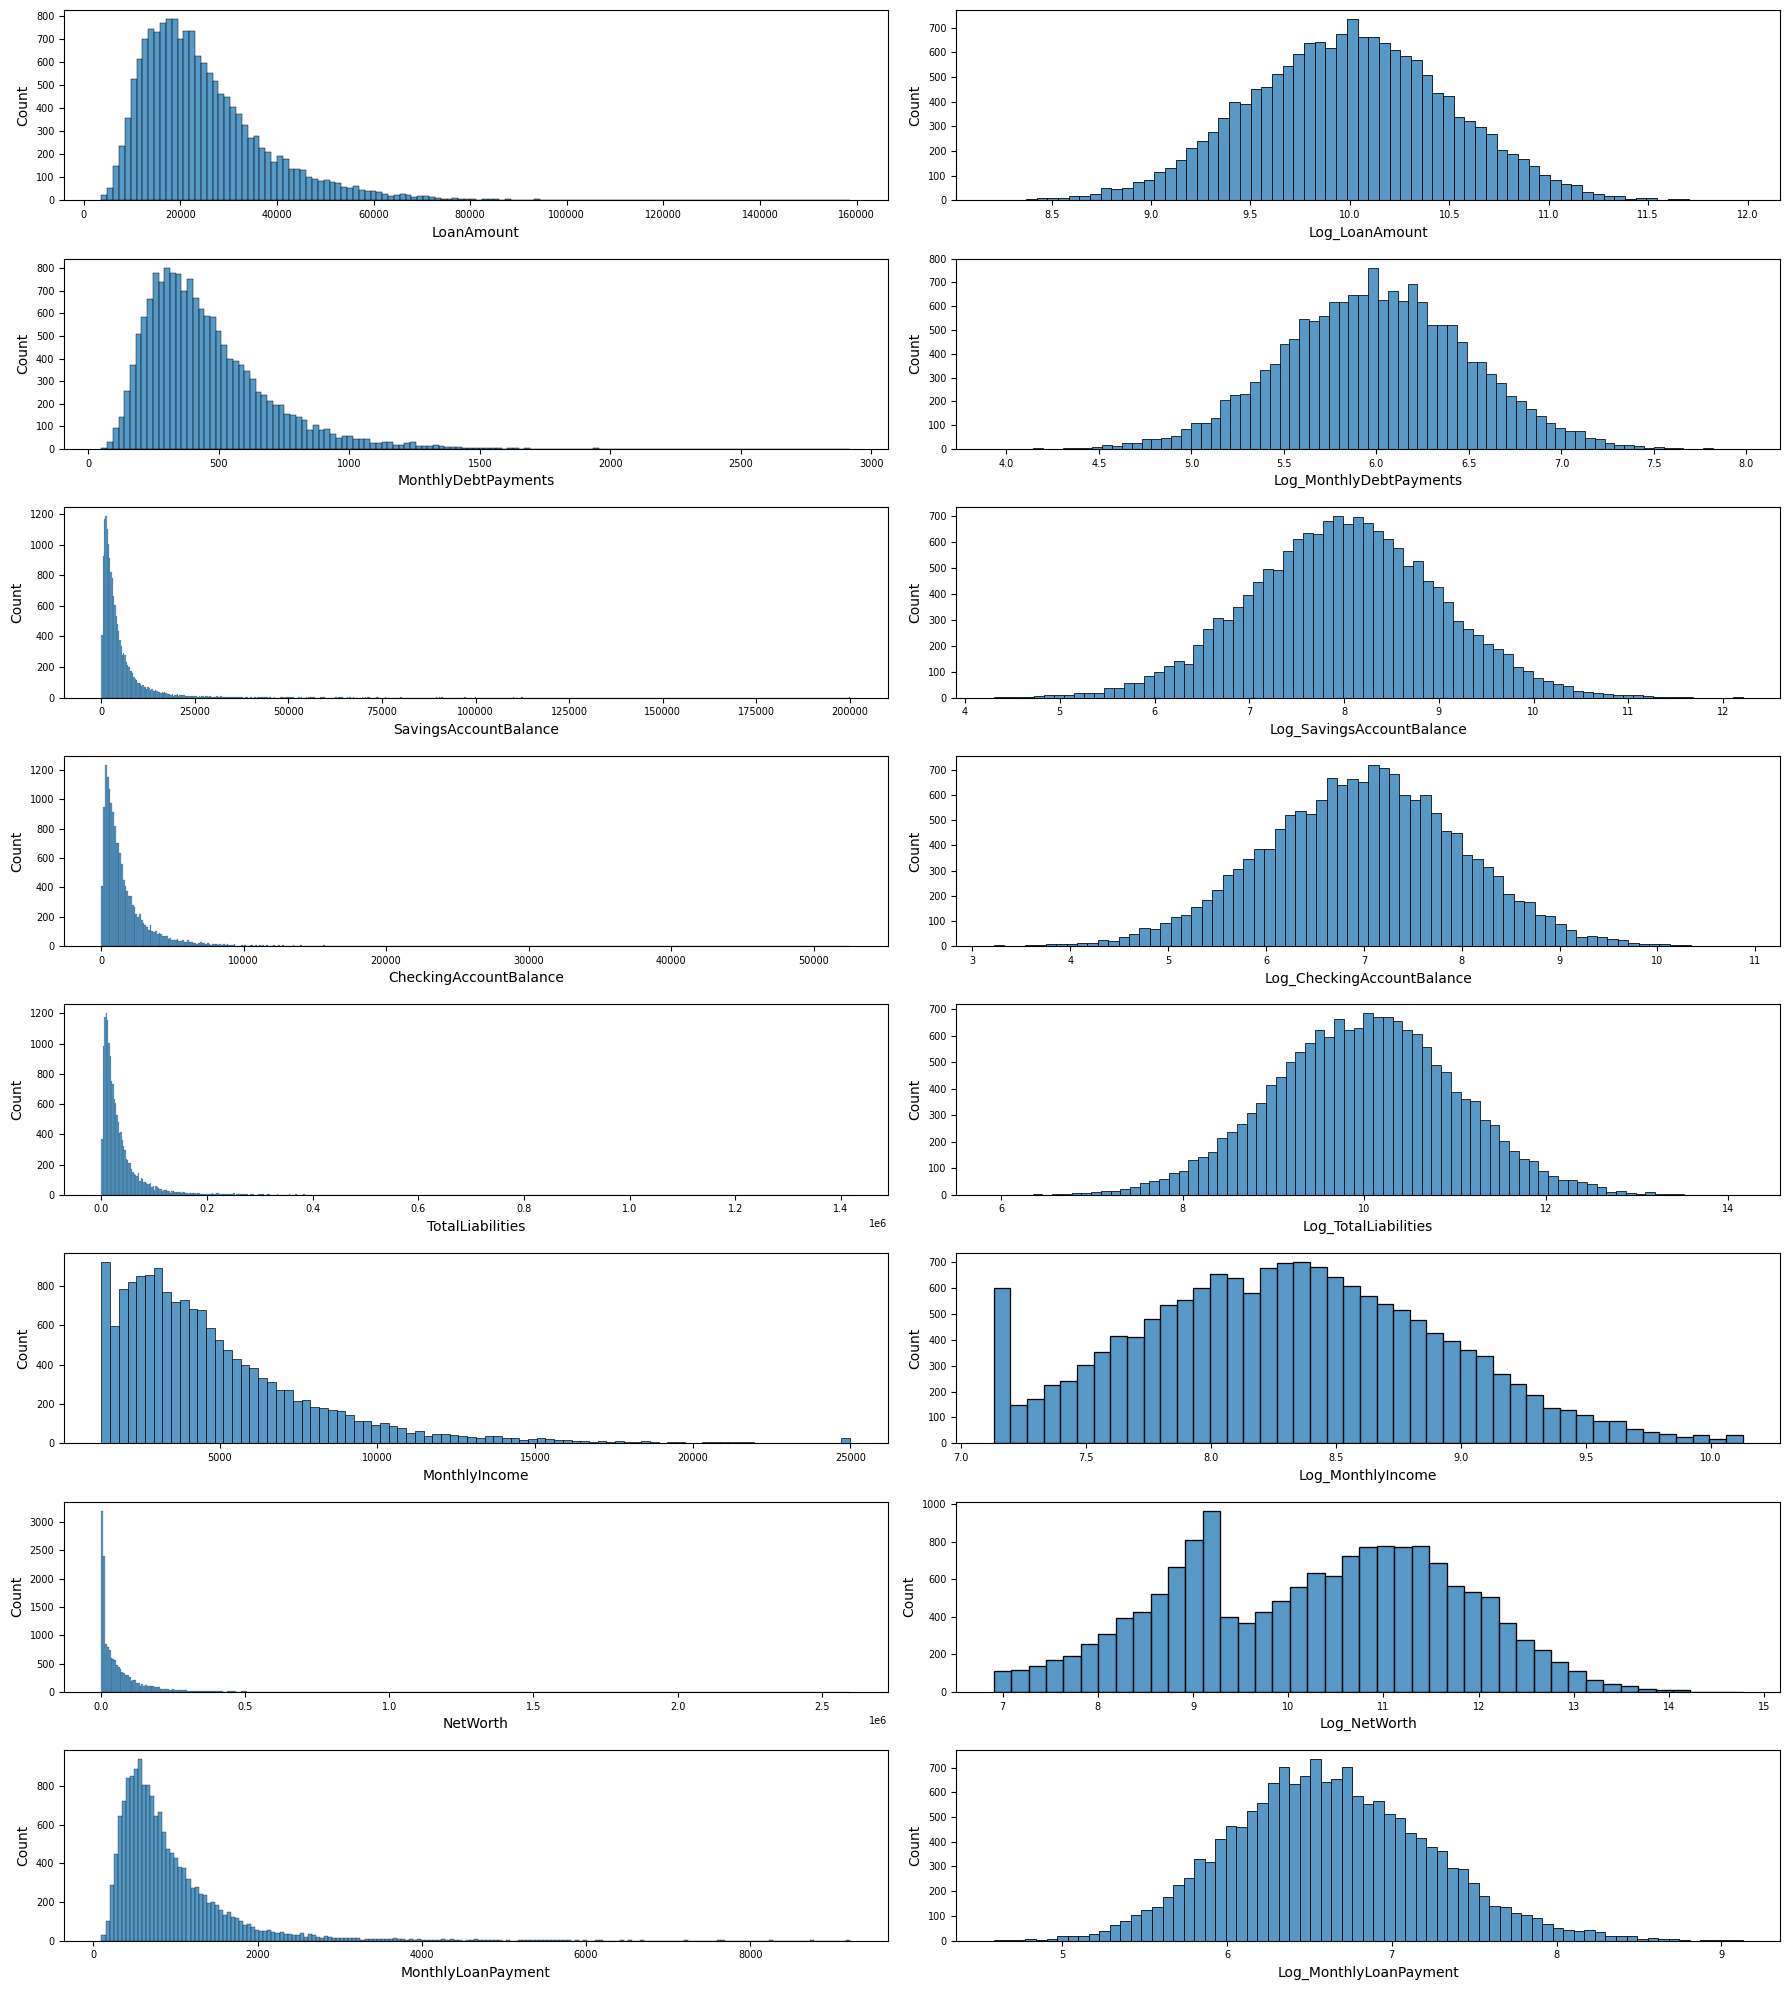

In [43]:
#Logarithmic Transformation
columns_logs = ['LoanAmount','MonthlyDebtsPayments','SavingsAccountBalance', 'CheckingAccountBalance',
                'TotalLiabilities','MonthlyIncome','NetWorth','MonthlyLoanPayment']

# Adjust the grid to 8x2 since there are 9 rows of data to plot
fig, axes = plt.subplots(8, 2, figsize=(18, 20))  # Adjust figsize as needed

# Plot each histogram
sns.histplot(data=log_cols, x='LoanAmount', palette='viridis', ax=axes[0, 0])
axes[0, 0].set_xlabel('LoanAmount')

sns.histplot(data=log_cols, x='Log_LoanAmount', palette='viridis', ax=axes[0, 1])
axes[0, 1].set_xlabel('Log_LoanAmount')

sns.histplot(data=log_cols, x='MonthlyDebtPayments', palette='viridis', ax=axes[1, 0])
axes[1, 0].set_xlabel('MonthlyDebtPayments')

sns.histplot(data=log_cols, x='Log_MonthlyDebtPayments', palette='viridis', ax=axes[1, 1])
axes[1, 1].set_xlabel('Log_MonthlyDebtPayments')

sns.histplot(data=log_cols, x='SavingsAccountBalance', palette='viridis', ax=axes[2, 0])
axes[2, 0].set_xlabel('SavingsAccountBalance')

sns.histplot(data=log_cols, x='Log_SavingsAccountBalance', palette='viridis', ax=axes[2, 1])
axes[2, 1].set_xlabel('Log_SavingsAccountBalance')

sns.histplot(data=log_cols, x='CheckingAccountBalance', palette='viridis', ax=axes[3, 0])
axes[3, 0].set_xlabel('CheckingAccountBalance')

sns.histplot(data=log_cols, x='Log_CheckingAccountBalance', palette='viridis', ax=axes[3, 1])
axes[3, 1].set_xlabel('Log_CheckingAccountBalance')

sns.histplot(data=log_cols, x='TotalLiabilities', palette='viridis', ax=axes[4, 0])
axes[4, 0].set_xlabel('TotalLiabilities')

sns.histplot(data=log_cols, x='Log_TotalLiabilities', palette='viridis', ax=axes[4, 1])
axes[4, 1].set_xlabel('Log_TotalLiabilities')

sns.histplot(data=log_cols, x='MonthlyIncome', palette='viridis', ax=axes[5, 0])
axes[5, 0].set_xlabel('MonthlyIncome')

sns.histplot(data=log_cols, x='Log_MonthlyIncome', palette='viridis', ax=axes[5, 1])
axes[5, 1].set_xlabel('Log_MonthlyIncome')

sns.histplot(data=log_cols, x='NetWorth', palette='viridis', ax=axes[6, 0])
axes[6, 0].set_xlabel('NetWorth')

sns.histplot(data=log_cols, x='Log_NetWorth', palette='viridis', ax=axes[6, 1])
axes[6, 1].set_xlabel('Log_NetWorth')

sns.histplot(data=log_cols, x='MonthlyLoanPayment', palette='viridis', ax=axes[7, 0])
axes[7, 0].set_xlabel('MonthlyLoanPayment')

sns.histplot(data=log_cols, x='Log_MonthlyLoanPayment', palette='viridis', ax=axes[7, 1])
axes[7, 1].set_xlabel('Log_MonthlyLoanPayment')

# Adjust layout
plt.tight_layout()
plt.show()


Transformation pipelines

In [44]:
from sklearn.pipeline import Pipeline

num_pipeline = Pipeline([
    ("impute", SimpleImputer(strategy='median')),
    ('standarize', StandardScaler())
]) #You have more control over the name of the steps

In [45]:
from sklearn import set_config

set_config(display='diagram')

num_pipeline #this would be the default pipeline

Pipeline(steps=[('impute', SimpleImputer(strategy='median')),
                ('standarize', StandardScaler())])

In [46]:
def monkey_patch_get_signature_names_out():
    """Monkey patch some classes which did not handle get_feature_names_out()
       correctly in Scikit-Learn 1.0.*."""
    from inspect import Signature, signature, Parameter
    import pandas as pd
    from sklearn.impute import SimpleImputer
    from sklearn.pipeline import make_pipeline, Pipeline
    from sklearn.preprocessing import FunctionTransformer, StandardScaler

    default_get_feature_names_out = StandardScaler.get_feature_names_out

    if not hasattr(SimpleImputer, "get_feature_names_out"):
      print("Monkey-patching SimpleImputer.get_feature_names_out()")
      SimpleImputer.get_feature_names_out = default_get_feature_names_out

    if not hasattr(FunctionTransformer, "get_feature_names_out"):
        print("Monkey-patching FunctionTransformer.get_feature_names_out()")
        orig_init = FunctionTransformer.__init__
        orig_sig = signature(orig_init)

        def __init__(*args, feature_names_out=None, **kwargs):
            orig_sig.bind(*args, **kwargs)
            orig_init(*args, **kwargs)
            args[0].feature_names_out = feature_names_out

        __init__.__signature__ = Signature(
            list(signature(orig_init).parameters.values()) + [
                Parameter("feature_names_out", Parameter.KEYWORD_ONLY)])

        def get_feature_names_out(self, names=None):
            if callable(self.feature_names_out):
                return self.feature_names_out(self, names)
            assert self.feature_names_out == "one-to-one"
            return default_get_feature_names_out(self, names)

        FunctionTransformer.__init__ = __init__
        FunctionTransformer.get_feature_names_out = get_feature_names_out

monkey_patch_get_signature_names_out()

In [47]:
#Corrected Version
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import FunctionTransformer

#In this cell I will define the pipelines for the derived categories, as well as the other transformations
def spread(X):
    return X[:,[0]] - X[:,[1]]

def spread_name(self,input_features):
    return ['spread']

def spread_pipeline():
    return make_pipeline(
        SimpleImputer(strategy='median'),
        FunctionTransformer(spread, feature_names_out=spread_name),
        StandardScaler()
    )

def IncomeStability(X):
    return (X[:,[0]] + X[:,[1]]) / X[:,[2]]

def IncomeStabilityName(self,input_features):
    return['income_stability_name']

def IncomeStability_pipeline():
    return make_pipeline(
        SimpleImputer(strategy='median'),
        FunctionTransformer(IncomeStability, feature_names_out=IncomeStabilityName),
        StandardScaler()
    )

def column_ratio(X):
    return X[:, [0]] / X[:, [1]]

def ratio_name(self,input_features):
    return ["ratio"]  # feature names out

def ratio_pipeline():
    return make_pipeline(
        SimpleImputer(strategy="median"),
        FunctionTransformer(column_ratio, feature_names_out=ratio_name),
        StandardScaler())

def disposable_income(X):
    return X[:, [0]] - X[:, [1]] - X[:, [2]]

def disposable_income_name(self, income_features):
    return ["disposable_income"]  # feature names out

def disposable_income_pipeline():
    return make_pipeline(
        SimpleImputer(strategy="median"),
        FunctionTransformer(disposable_income, feature_names_out=disposable_income_name),
        StandardScaler())


log_pipeline = make_pipeline(
    SimpleImputer(strategy="median"),
    FunctionTransformer(np.log, feature_names_out='one-to-one'),
    StandardScaler()
    )

def kernel_transformer_name(self, input_features):
    return ["kernel_similarity"]

kernel_transformer = FunctionTransformer(rbf_kernel, kw_args={'Y':[[17.5]], 'gamma':0.03}, feature_names_out=kernel_transformer_name)


kernel_pipeline = make_pipeline(
    SimpleImputer(strategy='median'),
    kernel_transformer,
    StandardScaler()
)

default_num_pipeline = make_pipeline(SimpleImputer(strategy='median'),
                                     StandardScaler())

cat_pipeline = make_pipeline(
    SimpleImputer(strategy='most_frequent'),
    OneHotEncoder(handle_unknown='ignore')
)

In [48]:
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector, make_column_transformer

preprocessing = ColumnTransformer([
        ("CreditInquiryIntensity", ratio_pipeline(), ["NumberOfCreditInquiries", "LengthOfCreditHistory"]),
        ("IncomeStability", IncomeStability_pipeline(), ["SavingsAccountBalance", "CheckingAccountBalance", "MonthlyIncome"]),
        ("DisposableIncome", disposable_income_pipeline(), ["MonthlyIncome","MonthlyDebtPayments", "MonthlyLoanPayment"]),
        ("log", log_pipeline, ["LoanAmount","MonthlyDebtPayments","SavingsAccountBalance","CheckingAccountBalance",
                               "TotalLiabilities","MonthlyIncome","NetWorth","MonthlyLoanPayment"]),
        ("ExperienceSimilarity", kernel_pipeline, ["Experience"]),
        ("cat", cat_pipeline, make_column_selector(dtype_include=object)),
    ],
    remainder=default_num_pipeline)  # one column remaining: housing_median_age

In [49]:
X_train_preprocessed = preprocessing.fit_transform(X_train)

In [51]:
#I will append the last preprocessing step into the pipeline, which would be the conversion to a dataframe
def to_dataframe_with_feature_names(X, feature_names, index):
    """
    Converts a NumPy array to a pandas DataFrame with proper feature names and index.
    
    Parameters:
        X: np.ndarray
            The transformed data.
        feature_names: list
            The feature names for the DataFrame columns.
        index: pd.Index
            The index to assign to the DataFrame.
    
    Returns:
        pd.DataFrame
    """
    return pd.DataFrame(X, columns=feature_names, index=index)


def dataframe_transformer(X, feature_names_out, index):
    """
    Wrapper for the to_dataframe_with_feature_names function to pass dynamic arguments.
    """
    return to_dataframe_with_feature_names(X, feature_names_out, index)

# Wrap in a FunctionTransformer
convert_to_df = FunctionTransformer(
    func=dataframe_transformer,
    feature_names_out="one-to-one"  # Preserve feature names
)

class CustomDataFrameConverter:
    def __init__(self, feature_names_func, index_func):
        """
        A custom transformer to convert output to a DataFrame.
        
        Parameters:
            feature_names_func: callable
                A function to extract feature names (e.g., `pipeline.get_feature_names_out`).
            index_func: callable
                A function to extract the index (e.g., `X_train.index`).
        """
        self.feature_names_func = feature_names_func
        self.index_func = index_func

    def transform(self, X):
        feature_names = self.feature_names_func()
        index = self.index_func()
        return to_dataframe_with_feature_names(X, feature_names, index)

    def fit(self, X, y=None):
        return self
    

preprocessing_with_df = make_pipeline(
    preprocessing,
    CustomDataFrameConverter(
        feature_names_func=preprocessing.get_feature_names_out,
        index_func=lambda: X_train.index  # Dynamically capture index from the training data
    )
)


In [52]:
X_train_df_prepared = preprocessing_with_df.fit_transform(X_train)
X_train_df_prepared

,CreditInquiryIntensity__ratio,IncomeStability__income_stability_name,DisposableIncome__disposable_income,log__LoanAmount,log__MonthlyDebtPayments,log__SavingsAccountBalance,log__CheckingAccountBalance,log__TotalLiabilities,log__MonthlyIncome,log__NetWorth,...,remainder__NumberOfDependents,remainder__CreditCardUtilizationRate,remainder__NumberOfOpenCreditLines,remainder__DebtToIncomeRatio,remainder__PaymentHistory,remainder__UtilityBillsPaymentHistory,remainder__JobTenure,remainder__BaseInterestRate,remainder__InterestRate,remainder__TotalDebtToIncomeRatio
9642,-0.301020,0.199859,-1.094268,2.206393,-0.236663,0.149038,0.783890,-1.457510,-0.914869,0.530847,...,-0.374823,-0.073446,0.565939,-1.077420,-0.204997,0.591792,-0.895546,0.208240,-0.115061,2.008053
17924,-0.268377,0.309627,-0.648498,-0.529069,-1.271746,0.537395,-0.095892,0.461272,-1.033505,-0.386627,...,-1.097026,-0.733072,-1.168519,-0.740050,1.207211,0.767530,-0.002066,-1.029861,-0.912156,-0.047599
1642,1.167925,-0.673463,2.546267,-0.177756,-0.833700,-1.057966,-0.251325,-0.661336,1.914272,-0.447718,...,2.513987,-0.482976,-0.590366,-0.265315,0.400235,-0.605596,-0.895546,0.216095,1.041503,-1.012302
9670,0.090699,-0.571452,0.604296,0.269079,-1.858818,-0.546848,-0.122408,0.031514,0.745643,-1.035298,...,0.347379,-1.559596,-0.012213,-0.677727,-0.406741,1.454350,0.891414,0.837468,0.748478,-0.821539
16860,-0.447914,0.245832,-0.446889,1.162947,-0.991018,0.403893,1.490190,2.250263,-0.226340,-0.848694,...,1.069582,0.198173,-0.012213,-0.598213,0.601979,-1.062801,-0.002066,2.394814,3.230666,0.085485
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7763,-0.199324,-0.172006,-1.164906,1.465894,-0.430919,-0.621371,-1.368518,-2.323641,-1.944379,0.715623,...,-1.097026,1.066889,-0.590366,-0.771998,-1.213718,-0.013153,0.444674,0.354181,0.223020,2.775028
15377,-0.447914,-0.434067,1.549026,-0.608626,-0.101136,0.568825,0.821462,-0.485346,1.447857,0.591684,...,-0.374823,-0.874821,1.144092,-1.159385,-0.003253,0.093124,-1.789027,-0.640264,-0.860620,-0.895055
17730,-0.447914,0.402464,-0.821960,-0.286205,-0.632403,0.348434,-0.727876,-0.349876,-1.585823,1.631369,...,-1.097026,-0.913036,-0.590366,-1.005990,0.803723,1.347592,-0.002066,0.453473,0.342001,0.352266
15725,1.167925,1.520852,-0.628657,-0.544346,1.321937,1.050551,1.961744,0.434648,-0.684062,-1.244538,...,0.347379,-0.744592,-0.012213,0.826053,-0.406741,-0.343755,-0.895546,1.387588,0.634741,0.226919


# 5. Data Modeling, Model Evaluation and Model Selection

In this section different regression approaches (with default parameters) were tested over the train dataset using 10-Fold Cross Validation. As a result, the best model was the Gradient Boosting with a mean MSE of 9.16.

In [67]:
#Before starting with the testing of the models, I will apply the preprocessing pipeline over the test set
X_test_df_prepared = preprocessing.transform(X_test)

In [54]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

lin_reg = make_pipeline(preprocessing, LinearRegression())
lin_reg_mses = -cross_val_score(lin_reg, X_train, Y_train, scoring='neg_mean_squared_error', cv = 10)
lin_reg_mses.mean()

np.float64(15.4126837693069)

In [55]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = make_pipeline(preprocessing, RandomForestRegressor(random_state=123))
forest_mses = -cross_val_score(forest_reg, X_train, Y_train, scoring='neg_mean_squared_error', cv = 10)
forest_mses.mean()

np.float64(9.73505725075)

In [56]:
from sklearn.ensemble import GradientBoostingRegressor

boosting_reg = make_pipeline(preprocessing, GradientBoostingRegressor(random_state=123))
boosting_mses = -cross_val_score(boosting_reg, X_train, Y_train, scoring='neg_mean_squared_error', cv = 10)
boosting_mses.mean()

np.float64(9.164923834586048)

In [57]:
from sklearn.neighbors import KNeighborsRegressor

knn_reg = make_pipeline(preprocessing, KNeighborsRegressor())
knn_mses = -cross_val_score(knn_reg, X_train, Y_train, scoring='neg_mean_squared_error', cv = 10)
knn_mses.mean()

np.float64(28.6072387)

In [58]:
from sklearn.linear_model import Ridge

ridge_reg = make_pipeline(preprocessing, Ridge())
ridge_mses = -cross_val_score(ridge_reg, X_train, Y_train, scoring='neg_mean_squared_error', cv = 10)
ridge_mses.mean()

np.float64(15.412662389936)

In [59]:
from sklearn.linear_model import Lasso

lasso_reg = make_pipeline(preprocessing, Lasso())
lasso_mses = -cross_val_score(lasso_reg, X_train, Y_train, scoring='neg_mean_squared_error', cv = 10)
lasso_mses.mean()

np.float64(34.41075962043832)

In [60]:
from sklearn.svm import SVR

SVR_reg = make_pipeline(preprocessing, SVR())
SVR_mses = -cross_val_score(SVR_reg, X_train, Y_train, scoring='neg_mean_squared_error', cv = 10)
SVR_mses.mean()


np.float64(12.657437124134614)

Since the best model was the gradient boosting, I will explore the feature importance to test some variations of the model:

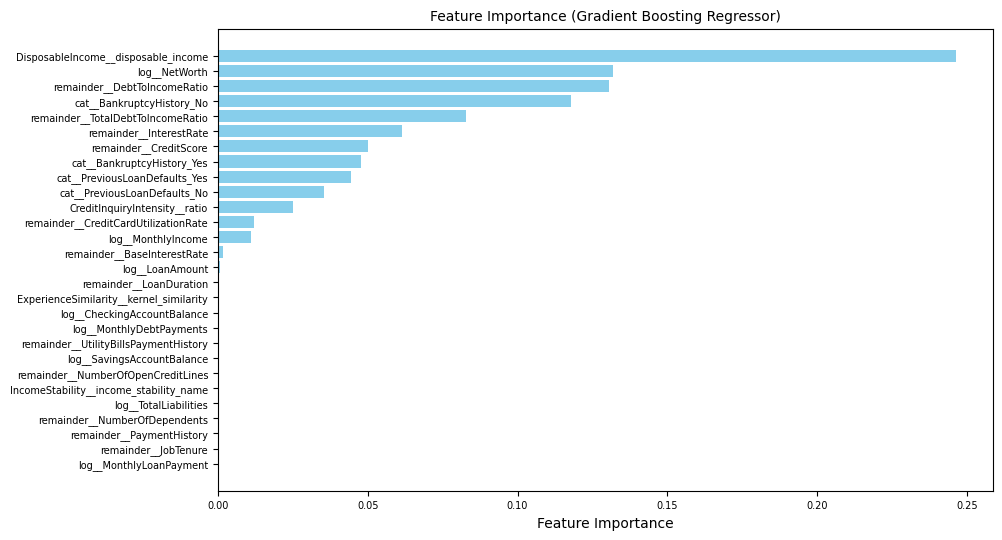

                                Feature  Importance
2   DisposableIncome__disposable_income    0.246283
9                         log__NetWorth    0.131788
21         remainder__DebtToIncomeRatio    0.130665
12            cat__BankruptcyHistory_No    0.117692
27    remainder__TotalDebtToIncomeRatio    0.082669
26              remainder__InterestRate    0.061360
16               remainder__CreditScore    0.050159
13           cat__BankruptcyHistory_Yes    0.047898
15        cat__PreviousLoanDefaults_Yes    0.044419
14         cat__PreviousLoanDefaults_No    0.035362


In [62]:
boosting_reg = make_pipeline(preprocessing, GradientBoostingRegressor(random_state=123))
boosting_reg.fit(X_train, Y_train)

# Access the trained Gradient Boosting Regressor from the pipeline
boosting_model = boosting_reg.named_steps['gradientboostingregressor']

# Get feature importances
importances = boosting_model.feature_importances_

# Get feature names from the preprocessing step
feature_names = preprocessing.get_feature_names_out()

# Create a DataFrame for feature importances
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Feature Importance (Gradient Boosting Regressor)')
plt.gca().invert_yaxis()  # Invert y-axis to show the most important features at the top
plt.show()

# Display the top 10 most important features
print(feature_importance_df.head(10))

In [70]:
#I will add a new step to the pipeline, in this case I will eliminate irrelevant columns
# Define a function to drop specific columns
def drop_columns(X, columns_to_drop):
    return np.delete(X, columns_to_drop, axis=1)

# Specify the indices or names of columns to drop
columns_to_drop = ['CreditInquiryIntensity__ratio',
       'DisposableIncome__disposable_income',
       'log__MonthlyIncome', 'log__NetWorth', 'cat__BankruptcyHistory_No',
       'cat__BankruptcyHistory_Yes', 'cat__PreviousLoanDefaults_No',
       'cat__PreviousLoanDefaults_Yes', 'remainder__CreditScore',
       'remainder__CreditCardUtilizationRate','remainder__DebtToIncomeRatio',
       'remainder__PaymentHistory', 'remainder__UtilityBillsPaymentHistory',
       'remainder__InterestRate', 'remainder__TotalDebtToIncomeRatio']

# Use a FunctionTransformer to apply the dropping step
drop_columns_transformer = FunctionTransformer(
    lambda X: drop_columns(X, [np.where(preprocessing.get_feature_names_out() == col)[0][0] for col in columns_to_drop])
)

# Add the dropping step to the pipeline
final_pipeline = Pipeline([
    ('preprocessing', preprocessing),
    ('drop_columns', drop_columns_transformer),
    ('model', GradientBoostingRegressor(random_state=123))
])

# Fit the pipeline
final_pipeline.fit(X_train, Y_train)

# Evaluate the pipeline
boosting_mses = -cross_val_score(final_pipeline, X_train, Y_train, scoring='neg_mean_squared_error', cv=10)
print('Mean MSE:', boosting_mses.mean())

Mean MSE: 41.49058510017445


Since the results of the model with a reduced dataset was significantly worst than the original model, I will continue using the original dataset.

# 6. Model Fine-Tuning and Evaluation on the Test Dataset 

I will perform a simple GridSearch to tune the hyperparameters of the gradient boosting model. In this case I will test 2 different numbers for the n_estimators (weak learners) and 2 different learning rates. Then the gradient boosting model, with the best set of hyperparameters will be tested on the test dataset, calculating the test MSE. As a result the best set of hyperparameters was n_estimators = 300 and learning_rate = 0.1.

In [73]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.pipeline import make_pipeline

# Define the pipeline
boosting_reg = make_pipeline(preprocessing, GradientBoostingRegressor(random_state=123))

# Define the parameter grid
param_grid = {
    'gradientboostingregressor__n_estimators': [100, 300],
    'gradientboostingregressor__learning_rate': [0.1, 0.5]
}

# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=boosting_reg,
    param_grid=param_grid,
    cv=10,
    scoring='neg_mean_squared_error',
    verbose=1
)

# Perform the grid search
grid_search.fit(X_train, Y_train)

# Output the best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", -grid_search.best_score_)


Fitting 10 folds for each of 4 candidates, totalling 40 fits
Best Parameters: {'gradientboostingregressor__learning_rate': 0.1, 'gradientboostingregressor__n_estimators': 300}
Best Score: 8.393137493008762


In [74]:
#Finally I will Evaluate the Best Model on the Test Set
best_model = grid_search.best_estimator_ #contains the preprocessing and the regressor
y_test_predictions = best_model.predict(X_test)
mse = mean_squared_error(Y_test, y_test_predictions)
mse

np.float64(8.926389204113294)

Finally, I will evaluate the predicted values:

In [81]:
#As a final step I will examine the descriptive statistics of the predicted values.
y_test_predictions_series = pd.Series(y_test_predictions)
y_test_predictions_series.describe()

count    4000.000000
mean       50.798554
std         6.963592
min        25.643100
25%        46.552198
50%        51.294640
75%        55.040023
max        78.848492
dtype: float64

In [85]:
#Confidence interval for the MSE
from scipy import stats


confidence = 0.95
errors = y_test_predictions - Y_test
mse = np.mean(errors ** 2)

# Compute the confidence interval for MSE
conf_int = stats.t.interval(confidence, len(errors) - 1,
                            loc=mse,
                            scale=stats.sem(errors ** 2))
conf_int

(np.float64(8.405121820361483), np.float64(9.447656587865104))

# 7. Conclusion

The Gradient Boosting model with n_estimators = 300 and learning_rate = 0.1 was the best model for predicting the risk score, with the MSE error estimated to lie between 8.41 and 9.45 with 95% confidence, indicating reliable predictions. The most important features for prediction were disposable income, net worth, and debt-to-income ratio. This model addresses the inefficiencies of manual risk assessment in credit organizations, which is time-consuming and prone to human error. By automating the risk score prediction, the model enables faster, more accurate decisions, improving loan approval processes, reducing bias, and enhancing operational efficiency.